### Course 3 - Applied Data Science with Python

#### Assignment 2 - Sales Analysis

##### Submission by - Prabhat Priyadarshi

In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
from matplotlib import pyplot as plt

sales_df = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [14]:
print(sales_df)

             Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]


In [23]:
sales_df['State'].dtype

dtype('O')

In [24]:
#vic_sales = sales_df[sales_df['State']=="WA"]
sales_df['State']=='WA'
#vic_sales

0       False
1       False
2       False
3       False
4       False
        ...  
7555    False
7556    False
7557    False
7558    False
7559    False
Name: State, Length: 7560, dtype: bool

#1 Assignment 2 Tasks:

1.	Data Wrangling

    *   Ensure that the data is clean and that there is no missing or incorrect data. ✔️
    *   Inspect the data manually for missing/incorrect data using the functions isna(), and notna(). ✔️
    *	Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them). ✔️
    *   (skip) Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data.  (Normalization is the preferred approach for this problem.) - 🚄
    *   Share your recommendation on the usage of the groupby() function for data chunking or merging. ✔️


#### Cleaning the Data and Checking for the missing values!

##### Checked for Null. (Null and Not a Number)

In [3]:
# Checking for NaN values in dataframe.

sales_df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [4]:
# Data Type before conversion to DateTime object
sales_df['Date'].dtype

dtype('O')

In [5]:
# Making Date consitent to correct datatype

sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [6]:
# Data Type after conversion to DateTime object
sales_df['Date'].dtype

dtype('<M8[ns]')

In [7]:
#Adding Month Number of Q4

sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Month'].dtype

dtype('int32')

In [8]:
#Adding Week Numbers in Q4

sales_df['Week'] = sales_df['Date'].dt.isocalendar().week
sales_df['Week'].dtype

UInt32Dtype()

In [9]:
display(sales_df)

,Date,Time,State,Group,Unit,Sales,Month,Week
0,2020-10-01,Morning,WA,Kids,8,20000,10,40
1,2020-10-01,Morning,WA,Men,8,20000,10,40
2,2020-10-01,Morning,WA,Women,4,10000,10,40
3,2020-10-01,Morning,WA,Seniors,15,37500,10,40
4,2020-10-01,Afternoon,WA,Kids,3,7500,10,40
...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,12,53
7556,2020-12-30,Evening,TAS,Kids,15,37500,12,53
7557,2020-12-30,Evening,TAS,Men,15,37500,12,53
7558,2020-12-30,Evening,TAS,Women,11,27500,12,53


In [10]:
#Cheking Month Numbers

sales_df['Month'].unique()

array([10, 11, 12])

In [11]:
#Checking week numbers

sales_df['Week'].unique()

<IntegerArray>
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Length: 14, dtype: UInt32

In [12]:
# Copying the dataframe for normalization
norm_sales_df = sales_df.copy()

sales_df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales', 'Month', 'Week'], dtype='object')

In [13]:
# Skipped Normalization (Scaling wrt max)

norm_sales_df['Unit'] = norm_sales_df['Unit']  / norm_sales_df['Unit'].abs().max()
norm_sales_df['Sales'] = norm_sales_df['Sales']  / norm_sales_df['Sales'].abs().max()
      
# view normalized data 
display(norm_sales_df)



,Date,Time,State,Group,Unit,Sales,Month,Week
0,2020-10-01,Morning,WA,Kids,0.123077,0.123077,10,40
1,2020-10-01,Morning,WA,Men,0.123077,0.123077,10,40
2,2020-10-01,Morning,WA,Women,0.061538,0.061538,10,40
3,2020-10-01,Morning,WA,Seniors,0.230769,0.230769,10,40
4,2020-10-01,Afternoon,WA,Kids,0.046154,0.046154,10,40
...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,0.215385,0.215385,12,53
7556,2020-12-30,Evening,TAS,Kids,0.230769,0.230769,12,53
7557,2020-12-30,Evening,TAS,Men,0.230769,0.230769,12,53
7558,2020-12-30,Evening,TAS,Women,0.169231,0.169231,12,53


#### Suggested Measures for treating Missing and Incorrect Data.

### No Missing or Incorrect Data Was Found, however we can perform:

    1. Drop the row or Fill the Missing Data by dropna() or fillna() | sales_df['Sales'].fillna(sales_df['Sales'].mean())
    2. Remove the duplicates by dropping the rows using drop_duplicates()
    3. Inconsistent values wrt expected data type in column, using data formating.
        converted Date from O type to DateTime
    

#### Data Chunking and Merging using group by

##### 1. Grouping the States and Person Groups and Minimum Units Sold in Each State

In [14]:
# Chunking the data by state and group, minimum units sold in each state

display(sales_df.groupby(["State", "Group"])['Unit'].min())

State  Group  
NSW    Kids       12
       Men        12
       Seniors    12
       Women      12
NT     Kids        2
       Men         2
       Seniors     2
       Women       2
QLD    Kids        3
       Men         3
       Seniors     3
       Women       3
SA     Kids       10
       Men        10
       Seniors    10
       Women      10
TAS    Kids        2
       Men         2
       Seniors     2
       Women       2
VIC    Kids       20
       Men        20
       Seniors    20
       Women      20
WA     Kids        2
       Men         2
       Seniors     2
       Women       2
Name: Unit, dtype: int64

##### 2. Grouping the States and Person Groups and "Maximum" Units Sold in Each State

In [15]:
# Chunking the data by state and group, maximum units sold in each state

display(sales_df.groupby(["State", "Group"])['Unit'].max())

State  Group  
NSW    Kids       45
       Men        45
       Seniors    45
       Women      45
NT     Kids       15
       Men        15
       Seniors    15
       Women      15
QLD    Kids       25
       Men        25
       Seniors    25
       Women      25
SA     Kids       35
       Men        35
       Seniors    35
       Women      35
TAS    Kids       15
       Men        15
       Seniors    15
       Women      15
VIC    Kids       65
       Men        64
       Seniors    65
       Women      65
WA     Kids       15
       Men        15
       Seniors    15
       Women      15
Name: Unit, dtype: int64

##### 3. Grouping the States and Person Groups and Average Sales in Each State wrt Each Group

In [11]:
# Average Sales Data of Groups across various states.

display(pd.DataFrame(sales_df.groupby(['Group','State'], as_index = False)['Sales'].mean()))

,Group,State,Sales
0,Kids,NSW,68842.592593
1,Kids,NT,21111.111111
2,Kids,QLD,31518.518519
3,Kids,SA,53759.259259
4,Kids,TAS,21388.888889
5,Kids,VIC,97629.629630
6,Kids,WA,20833.333333
7,Men,NSW,70453.703704
8,Men,NT,21342.592593
9,Men,QLD,31083.333333


##### 4. Grouping the States and Time of the Day and Maximum Units Sold in Each State

In [17]:
# Chunking the data by time and maximum units sold at various states.
timeod_state_max_units = pd.DataFrame(sales_df.groupby(["Time", "State"], as_index=False)['Unit'].max())
display(timeod_state_max_units)

,Time,State,Unit
0,Afternoon,NSW,44
1,Afternoon,NT,15
2,Afternoon,QLD,25
3,Afternoon,SA,35
4,Afternoon,TAS,15
5,Afternoon,VIC,65
6,Afternoon,WA,15
7,Evening,NSW,45
8,Evening,NT,15
9,Evening,QLD,25


##### 5. Grouping the Time of the Day and Person Groups and Maximum Units Sold in Each Group

In [18]:
# Chunking the data by time and maximum units purchased by various groups.
timeod_group_max_units = pd.DataFrame(sales_df.groupby(["Time", "Group"], as_index=False)['Unit'].max())
display(timeod_group_max_units)

,Time,Group,Unit
0,Afternoon,Kids,65
1,Afternoon,Men,63
2,Afternoon,Seniors,65
3,Afternoon,Women,65
4,Evening,Kids,60
5,Evening,Men,64
6,Evening,Seniors,65
7,Evening,Women,65
8,Morning,Kids,63
9,Morning,Men,64


### 2.	Data Analysis
    *   Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.). ✔️
    *   Determine which group is generating the highest sales, and which group is generating the lowest sales. ✔️
    *   Determine which state is generating the highest sales, and which state is generating the lowest sales. ✔️
    *   Generate weekly, monthly and quarterly reports for the analysis made.✔️
        (Use suitable libraries such as NumPy, Pandas, SciPy etc. for performing the analysis.)


#### 2.1 Descriptive Statistical Analysis

In [19]:
# Primary Descriptive Statistical Analysis using DataFrame describe()
sales_df.describe()

,Date,Unit,Sales,Month,Week
count,7560,7560.000000,7560.000000,7560.000000,7560.0
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,11.000000,46.455556
min,2020-10-01 00:00:00,2.000000,5000.000000,10.000000,40.0
25%,2020-10-23 00:00:00,8.000000,20000.000000,10.000000,43.0
50%,2020-11-15 12:00:00,14.000000,35000.000000,11.000000,46.5
75%,2020-12-08 00:00:00,26.000000,65000.000000,12.000000,50.0
max,2020-12-30 00:00:00,65.000000,162500.000000,12.000000,53.0
std,NaN,12.901403,32253.506944,0.816551,3.786662


In [20]:
# Meadian and Mode of the Sales Data Frame
print("Median of Sold Units:" ,sales_df['Unit'].median())
print("Median of Sales Made: ",sales_df['Sales'].median())
print("Mode of Sold Units:" ,sales_df['Unit'].mode())
print("Mode of Sales Made: ",sales_df['Sales'].mode())

Median of Sold Units: 14.0
Median of Sales Made:  35000.0
Mode of Sold Units: 0    9
Name: Unit, dtype: int64
Mode of Sales Made:  0    22500
Name: Sales, dtype: int64


#### 2.2 Which group is generating the highest and lowest sales.

In [21]:
# Which group is producing the highest and lowest sales.

print("Sales Data by Person Group: \n")
group_group = pd.DataFrame(sales_df.groupby('Group', as_index = False)['Sales'].sum()).sort_values(by=['Sales'],ascending=False)
display(group_group)
display("Highest Sales: ",group_group.iloc[0,:],"Lowest Sales: ",group_group.iloc[-1,:])

Sales Data by Person Group: 



,Group,Sales
1,Men,85750000
3,Women,85442500
0,Kids,85072500
2,Seniors,84037500


'Highest Sales: '

Group         Men
Sales    85750000
Name: 1, dtype: object

'Lowest Sales: '

Group     Seniors
Sales    84037500
Name: 2, dtype: object

#### 2.3 Which state is generating the highest and lowest sales.

In [22]:
# Which state is producing the highest and lowest sales.

print("Sales Data by State: \n")
state_group = pd.DataFrame(sales_df.groupby('State')['Sales'].sum()).sort_values(by=['Sales'],ascending=False)
#display(state_group)
display("Highest Sales: ",state_group.iloc[0,:],"Lowest Sales: ",state_group.iloc[-1,:])

Sales Data by State: 



'Highest Sales: '

Sales    105565000
Name:  VIC, dtype: int64

'Lowest Sales: '

Sales    22152500
Name:  WA, dtype: int64

#### 2.4 Weekly and Monthly Reports of Highest and Lowest Sales wrt Groups and State.

##### 2.4.1 Weekly Reports of Highest and Lowest Sales Made by various Person Groups

In [23]:
# Weekly Reports of Sales Data - Sales made by Groups
weekly_group_sales = pd.DataFrame(sales_df.groupby(['Week','Group'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False))
#display(weekly_group_sales)
display("Highest Sales: ",weekly_group_sales.iloc[0,:],"Lowest Sales: ",weekly_group_sales.iloc[-1,:])

'Highest Sales: '

Week          52
Group        Men
Sales    8337500
Name: 49, dtype: object

'Lowest Sales: '

Week          53
Group        Men
Sales    3402500
Name: 53, dtype: object

##### 2.4.2 Weekly Reports of Highest and Lowest Sales Made across different States

In [24]:
# Weekly Reports of Sales Data - Sales made in States
weekly_state_sales = pd.DataFrame(sales_df.groupby(['Week','State'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False))
#display(weekly_state_sales)
display("Highest Sales: ",weekly_state_sales.iloc[0,:],"Lowest Sales: ",weekly_state_sales.iloc[-1,:])

'Highest Sales: '

Week           52
State         VIC
Sales    10345000
Name: 89, dtype: object

'Lowest Sales: '

Week         53
State        WA
Sales    925000
Name: 97, dtype: object

##### 2.4.3 Monthly Reports of Highest and Lowest Sales Made by various Person Groups

In [25]:
# Monthly Reports of Sales Data - Sales made by Groups
monthly_group_sales = pd.DataFrame(sales_df.groupby(['Month','Group'], as_index=False)['Sales'].sum())
#display(monthly_group_sales)
display("Highest Sales: ",monthly_group_sales.iloc[0,:],"Lowest Sales: ",monthly_group_sales.iloc[-1,:])

'Highest Sales: '

Month          10
Group        Kids
Sales    28635000
Name: 0, dtype: object

'Lowest Sales: '

Month          12
Group       Women
Sales    34375000
Name: 11, dtype: object

##### 2.4.4 Monthly Reports of Highest and Lowest Sales Made across different States

In [26]:
# Monthly Reports of Sales Data - Sales made in State
monthly_state_sales = pd.DataFrame(sales_df.groupby(['Month','State'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False))
#display(monthly_state_sales)
display("Highest Sales: ",monthly_state_sales.iloc[0,:],"Lowest Sales: ",monthly_state_sales.iloc[-1,:])

'Highest Sales: '

Month          12
State         VIC
Sales    42592500
Name: 19, dtype: object

'Lowest Sales: '

Month         11
State         WA
Sales    5217500
Name: 13, dtype: object

##### 2.4.5 Quarterly Reports of Highest and Lowest Sales Made by various Person Groups

In [27]:
q4_sales_df = sales_df.copy()

q4_sales_df['Quarter'] = 'Q4'

In [28]:
# Quarterly Reports of Sales Data - Sales made in State
quarterly_group_sales = pd.DataFrame(q4_sales_df.groupby('Group', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False))
#display(quarterly_state_sales)
display("Highest Sales: ",quarterly_group_sales.iloc[0,:],"Lowest Sales: ",quarterly_group_sales.iloc[-1,:])

'Highest Sales: '

Group         Men
Sales    85750000
Name: 1, dtype: object

'Lowest Sales: '

Group     Seniors
Sales    84037500
Name: 2, dtype: object

##### 2.4.6 Quarterly Reports of Highest and Lowest Sales Made across Different States

In [29]:
# Quarterly Reports of Sales Data - Sales made in State
quarterly_state_sales = pd.DataFrame(q4_sales_df.groupby('State', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False))
#display(quarterly_state_sales)
display("Highest Sales: ",quarterly_state_sales.iloc[0,:],"Lowest Sales: ",quarterly_state_sales.iloc[-1,:])

'Highest Sales: '

State          VIC
Sales    105565000
Name: 5, dtype: object

'Lowest Sales: '

State          WA
Sales    22152500
Name: 6, dtype: object

#### 2.5 Weekly, Monthly and Quartely Analysis of Above reports?? 
###### Using seaborn

##### 2.5.1 Visualization of Weekly Sales Report

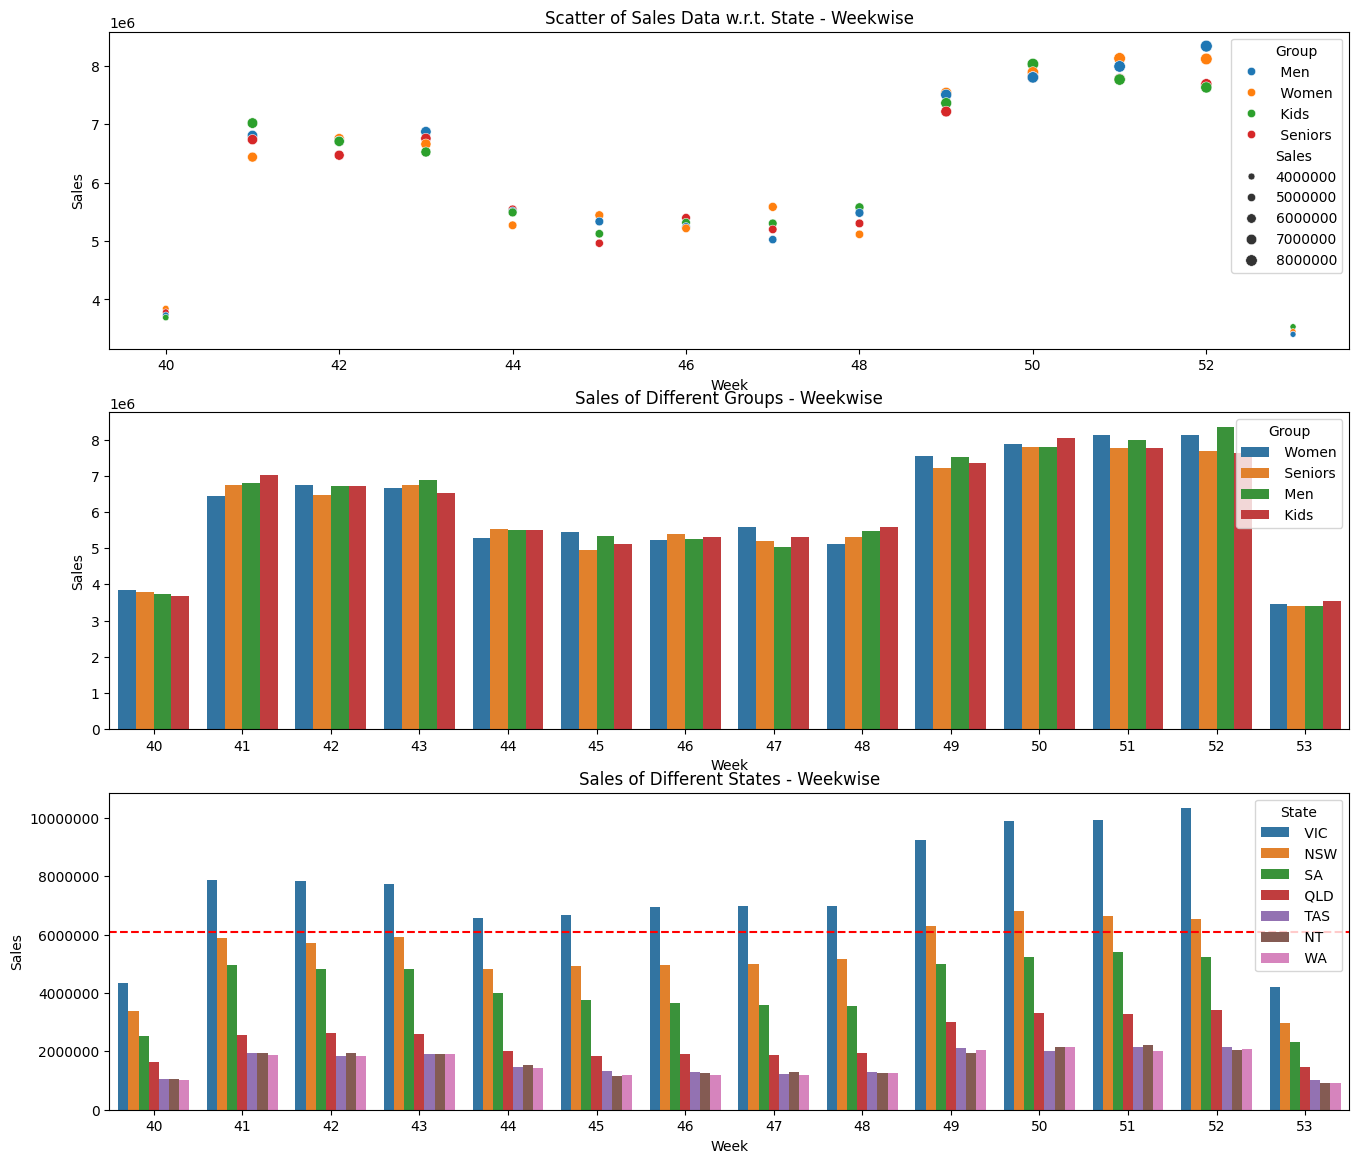

In [30]:
# Using 2 stacked Seaborn Subplots

fig, axes = plt.subplots(3,1, figsize=(16,14))

# Weekly Group All Sales Scatter

sbn.scatterplot(ax=axes[0], data= weekly_group_sales, x = 'Week', y = 'Sales', hue = 'Group', size='Sales')
plt.axhline(y=weekly_group_sales.Sales.mean(), color='red', ls='--')
axes[0].set_title("Scatter of Sales Data w.r.t. State - Weekwise")

sbn.barplot(ax=axes[1],data=weekly_group_sales, x='Week', y='Sales', hue='Group')
axes[1].set_title("Sales of Different Groups - Weekwise")
plt.ticklabel_format(style='plain', axis='y')

sbn.barplot(ax=axes[2],data=weekly_state_sales, x='Week', y='Sales', hue='State')
axes[2].set_title("Sales of Different States - Weekwise")


plt.show()

###### 2.5.1.1 Interpretation:
###### Graph 1: For Each week, the sales made by each group is scattered, higher the point, more the sales. This gives us which group is making highest and which group is making lowest sales.

###### Graph 2: For Each week, the sales made by each group is shown in bar, higher the bar, more the sales. This gives us which group is making highest and which group is making lowest sales in different weeks.

###### Graph 3: For Each week, the sales made by each state is shown in bar, higher the bar, more the sales. This gives us which state is making highest and which state is making lowest sales in different weeks.

##### 2.5.2 Visualization of Monthly Sales Report

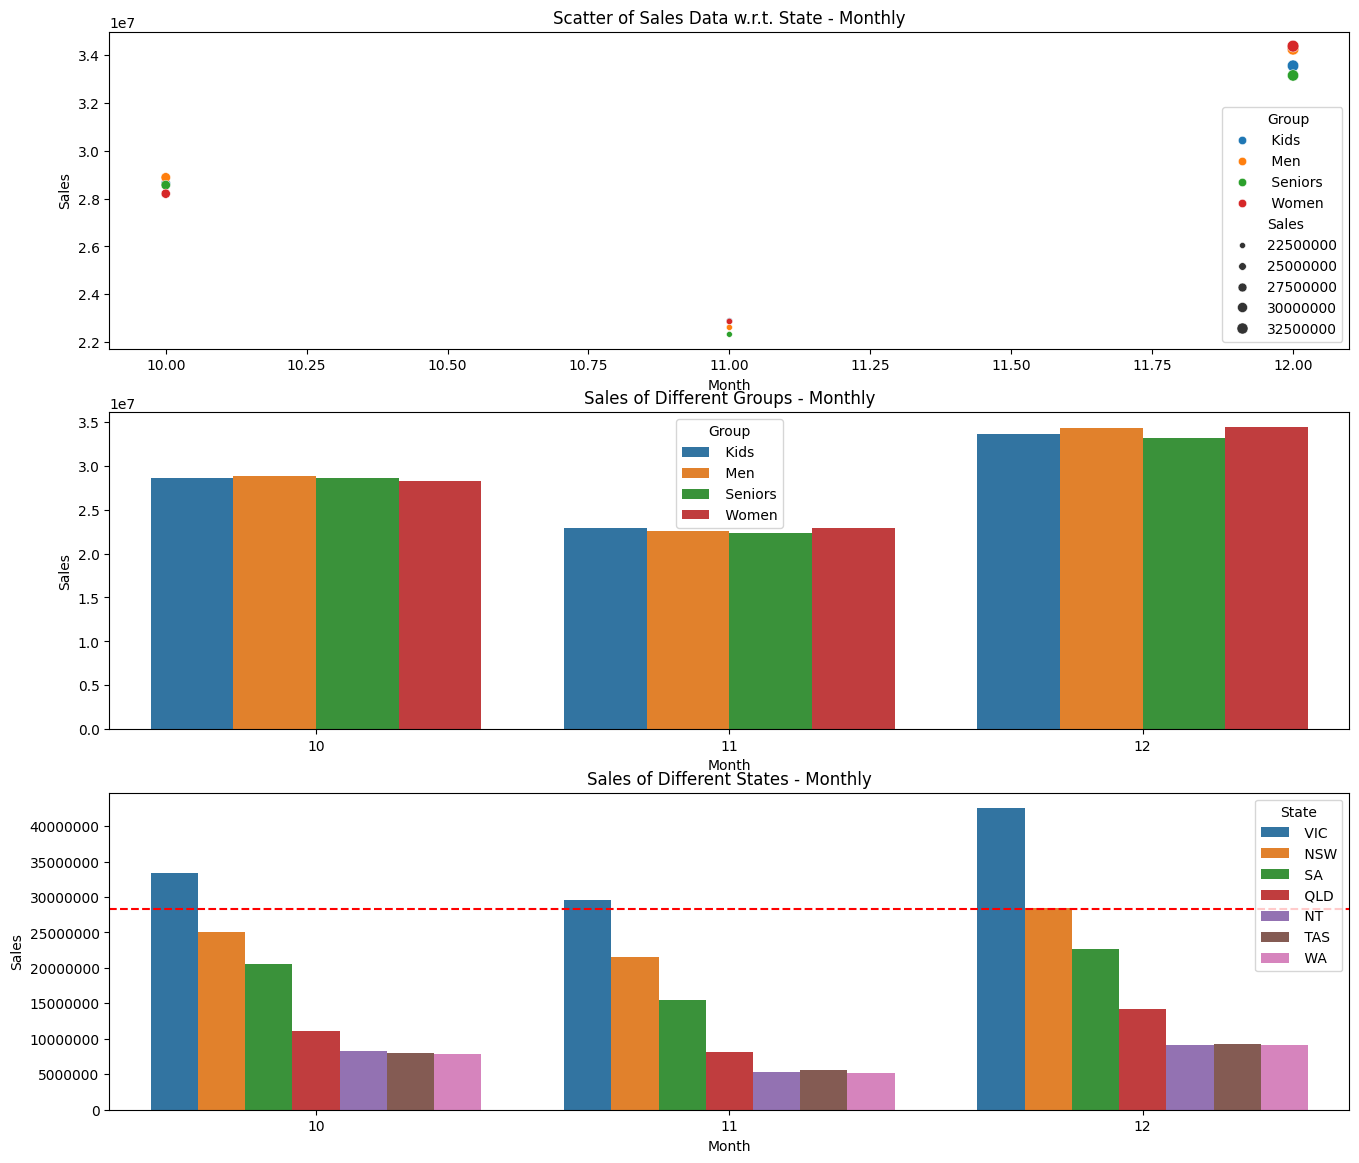

In [31]:
# Using 2 stacked Seaborn Subplots

fig, axes = plt.subplots(3,1, figsize=(16,14))

# Weekly Group All Sales Scatter

sbn.scatterplot(ax=axes[0], data= monthly_group_sales, x = 'Month', y = 'Sales', hue = 'Group', size='Sales')
plt.axhline(y=monthly_group_sales.Sales.mean(), color='red', ls='--')
axes[0].set_title("Scatter of Sales Data w.r.t. State - Monthly")

sbn.barplot(ax=axes[1],data=monthly_group_sales, x='Month', y='Sales', hue='Group')
axes[1].set_title("Sales of Different Groups - Monthly")
plt.ticklabel_format(style='plain', axis='y')

sbn.barplot(ax=axes[2],data=monthly_state_sales, x='Month', y='Sales', hue='State')
axes[2].set_title("Sales of Different States - Monthly")


plt.show()

###### 2.5.2.1 Interpretation:
###### Graph 1: For Each month, the sales made by each group is scattered, higher the point, more the sales. This gives us which group is making highest and which group is making lowest sales.

###### Graph 2: For Each month, the sales made by each group is shown in bar, higher the bar, more the sales. This gives us which group is making highest and which group is making lowest sales in different months.

###### Graph 3: For Each month, the sales made by each state is shown in bar, higher the bar, more the sales. This gives us which state is making highest and which state is making lowest sales in different months.

##### 2.5.3 Visualization of Quarterly Sales Report

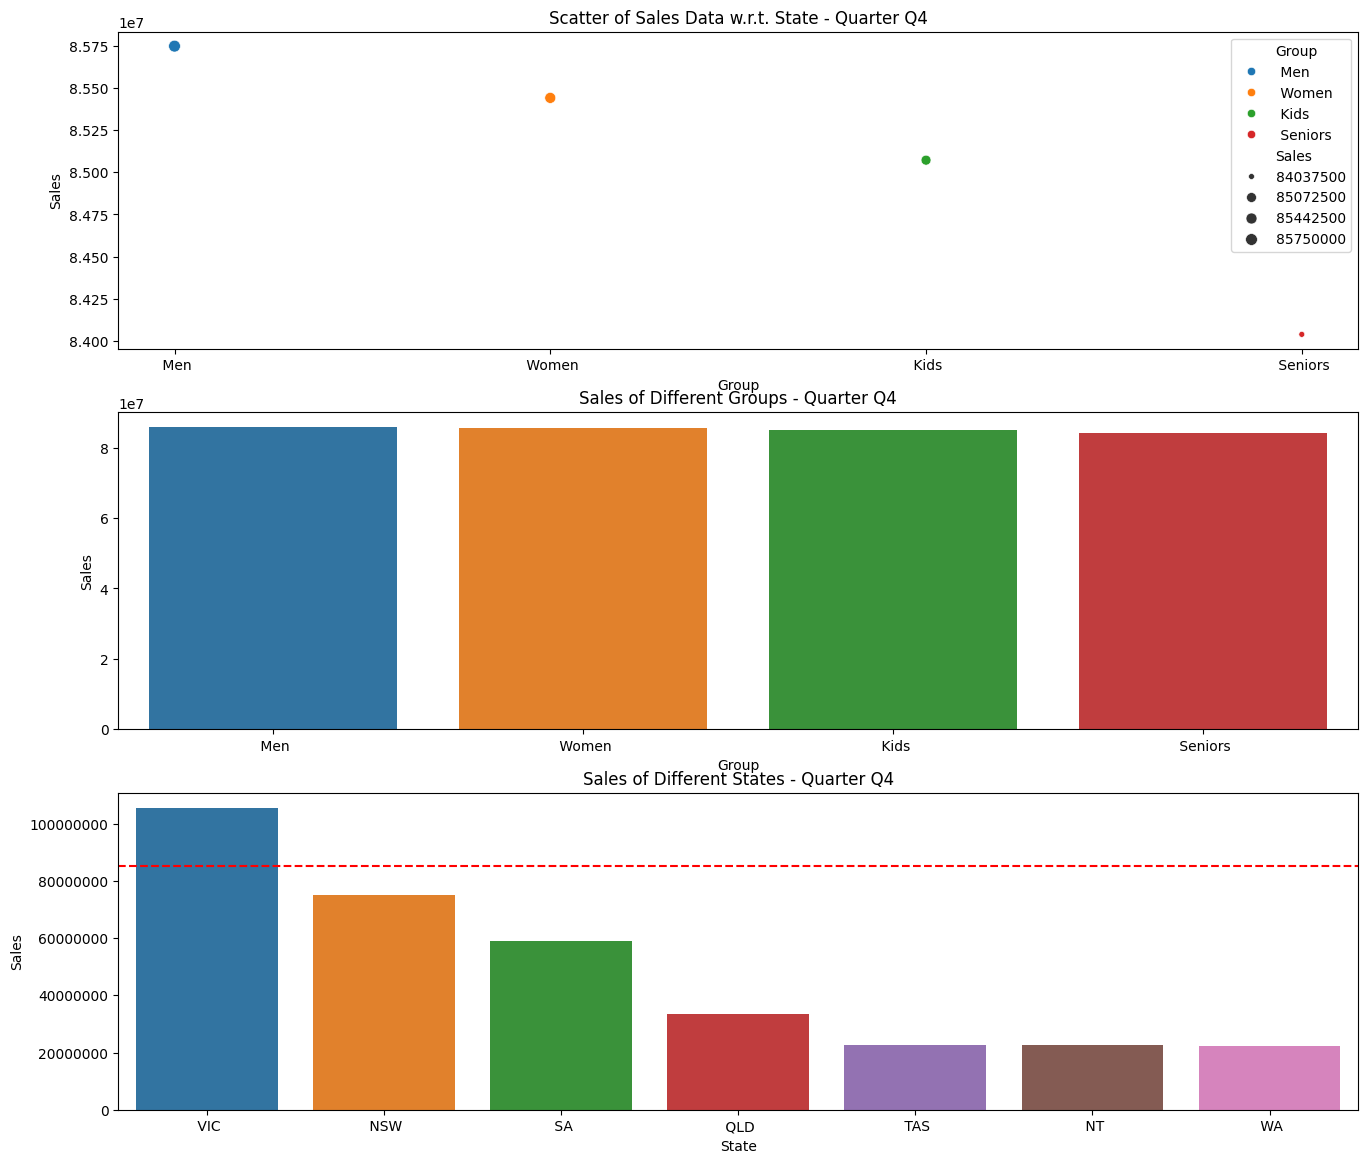

In [32]:
# Using 2 stacked Seaborn Subplots

fig, axes = plt.subplots(3,1, figsize=(16,14))

# Weekly Group All Sales Scatter

sbn.scatterplot(ax=axes[0], data= quarterly_group_sales, x = 'Group', y = 'Sales', hue = 'Group', size='Sales')
plt.axhline(y=quarterly_group_sales.Sales.mean(), color='red', ls='--')
axes[0].set_title("Scatter of Sales Data w.r.t. State - Quarter Q4")

sbn.barplot(ax=axes[1],data=quarterly_group_sales, x='Group', y='Sales', hue='Group')
axes[1].set_title("Sales of Different Groups - Quarter Q4")
plt.ticklabel_format(style='plain', axis='y')

sbn.barplot(ax=axes[2],data=quarterly_state_sales, x='State', y='Sales', hue='State')
axes[2].set_title("Sales of Different States - Quarter Q4")


plt.show()

###### 2.5.3.1 Interpretation:
###### Graph 1: For Each quarter, the sales made by each group is scattered, higher the point, more the sales. This gives us which group is making highest and which group is making lowest sales.

###### Graph 2: For Each quarter, the sales made by each group is shown in bar, higher the bar, more the sales. This gives us which group is making highest and which group is making lowest sales in this quarter.

###### Graph 3: For Each quarter, the sales made by each state is shown in bar, higher the bar, more the sales. This gives us which state is making highest and which state is making lowest sales in this quarter.

## 3. Data Visualization

#### Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like 
    *    State-wise sales analysis for different groups (kids, women, men, and seniors) 
    *    Group-wise sales analysis (kids, women, men, and seniors) across different states.
    *    Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest?
         [This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].
    *    The dashboard must contain daily, weekly, monthly and quarterly charts.
    *    (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)


In [50]:
display(sales_df)

,Date,Time,State,Group,Unit,Sales,Month,Week
0,2020-10-01,Morning,WA,Kids,8,20000,10,40
1,2020-10-01,Morning,WA,Men,8,20000,10,40
2,2020-10-01,Morning,WA,Women,4,10000,10,40
3,2020-10-01,Morning,WA,Seniors,15,37500,10,40
4,2020-10-01,Afternoon,WA,Kids,3,7500,10,40
...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,12,53
7556,2020-12-30,Evening,TAS,Kids,15,37500,12,53
7557,2020-12-30,Evening,TAS,Men,15,37500,12,53
7558,2020-12-30,Evening,TAS,Women,11,27500,12,53


In [1]:
#State-wise sales analysis for different groups (kids, women, men, and seniors)
#for daily, line plots --- four subplots for each group, and seven rows for each state
# Show Mean Sales



### 3.1 HSM Dashboard (Using Seaborn)

#### Box Plot - Statistical Representation

#### Scatter Plot - Data Distribution

#### 3.1.1 HSM Dashboard - Daily Data Trends and Statistics

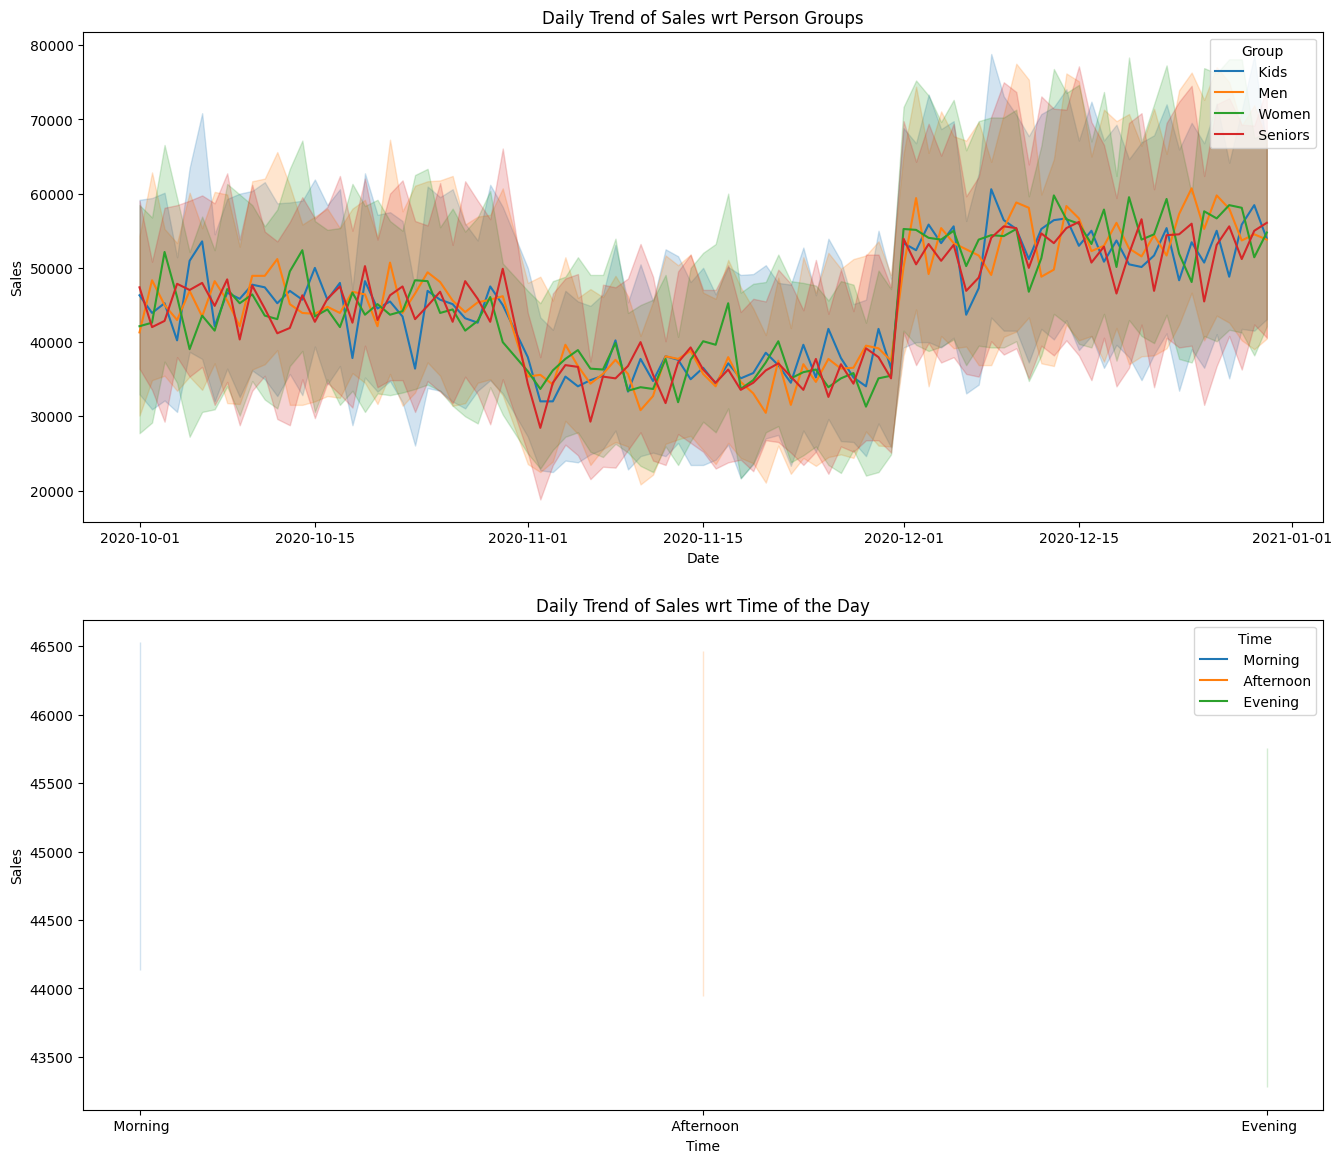

In [33]:
# Subplots for Daily Data Trends
# State Wise
# Group Wise


fig, axes = plt.subplots(2,1, figsize=(16,14))

# Weekly Group All Sales Scatter

sbn.lineplot(ax=axes[0], data = sales_df, x="Date", y="Sales", hue="Group", sort = True, estimator = "mean")
#plt.axhline(y=sales_df.Sales.mean(), color='red', ls='--')
axes[0].set_title("Daily Trend of Sales wrt Person Groups")

sbn.lineplot(ax=axes[1], data = sales_df, x="Time", y="Sales", hue="Time", sort = True, estimator = "mean")
#plt.axhline(y=sales_df.Sales.mean(), color='red', ls='--')
axes[1].set_title("Daily Trend of Sales wrt Time of the Day")

plt.show()

### 3.2 HSM Dashboard (Using Plotly Express & Graph Objects)

#### Box Plot - Statistical Representation

#### Scatter Plot - Data Distribution

In [34]:
# Library import

import plotly.express as px

In [35]:
state_group_min_sales = pd.DataFrame(sales_df.groupby(['State','Group'], as_index = False)['Sales'].min())
#display(state_group_min_sales)

In [36]:
# State Group Maximum Sales
state_group_max_sales = pd.DataFrame(sales_df.groupby(['State','Group'], as_index = False)['Sales'].max())
#display(state_group_max_sales)

In [37]:
# State Group Average sales
state_group_avg_sales = pd.DataFrame(sales_df.groupby(['State','Group'], as_index = False)['Sales'].mean())
#display(state_group_avg_sales)

##### Selecting the Visualization Library (plotly):
### Plotly proved detailed and interactive in nature.

###### The choice between Matplotlib, Seaborn, and Plotly ultimately depends on your project requirements, familiarity with coding, and the type of visualizations you aim to create. Matplotlib offers extensive customization but demands more code, Seaborn simplifies statistical plots with built-in themes, and Plotly excels at creating dynamic and interactive visualizations.

###### If you prefer precise control over plot aesthetics and are comfortable writing code, Matplotlib might be your choice. If you’re aiming for informative statistical plots with less effort, Seaborn could be the go-to. For interactive dashboards and web applications that engage users, Plotly offers a powerful solution.

#### Building Dashboard using Subplots.

##### The Subplot has:

    1. State wise analysis of different groups.
    2. Group wise analysis across different states.
    3. Time of the Day analysis - Highest and Lowest Sales.
    All of the above in daily, weekly, monthly and quarterly charts.

In [38]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import statsmodels

##### Visualization of Daily Data - All Data Scatter Plot, Bigger Point Showing Higher Sold Units (Grouping by Person Groups)

In [39]:
# Daily Sales Data All
fig = px.scatter(sales_df, x = 'Date', y='Sales', color='Group', size='Unit', symbol='Group', trendline='ols', title='Daily Sales - All Data Scatter, Bigger Point Showing Higher Sold units')

fig.show()

In [40]:
# Daily Sales Statistics grouped by People Group.
fig = px.box(sales_df, x = 'Date', y='Sales', color='Group')
fig.update_traces(boxmean=True)
fig.show()

In [41]:
# Daily Sales Statistics grouped by State.
fig = px.box(sales_df, x = 'Date', y='Sales', color='State')
fig.update_traces(boxmean=True)
fig.show()

In [42]:
# Daily Sales Statistics grouped by Time of the Day.
fig = px.box(sales_df, x = 'Date', y='Sales', color='Time')
fig.update_traces(boxmean=True)
fig.show()

#### Visualization of Weekly Data (State Wise (among groups), Group Wise (across states) and Time of Day)

In [43]:
# Weekly Sales All Data
fig = px.scatter(sales_df, x = 'Week', y='Sales', color='State', size='Unit', symbol='State')

fig.show()

In [44]:
# All Weekly Data Statitics wrt State
fig = px.box(sales_df, x = 'Week', y='Sales', color='State')
fig.update_traces(boxmean=True)
fig.show()

In [45]:
# All Weekly Data Statitics wrt Group
fig = px.box(sales_df, x = 'Week', y='Sales', color='Group', title= "Weekly Sales Data across Different Groups.")
fig.update_traces(boxmean=True)
fig.show()

###### Data Frames for Line Graphs

In [46]:
# Weekly Data Holding DataFrames

weekly_state_min_sales = pd.DataFrame(sales_df.groupby(['Week','State'], as_index= False)['Sales'].min())
weekly_state_avg_sales = pd.DataFrame(sales_df.groupby(['Week','State'], as_index= False)['Sales'].mean())
weekly_state_max_sales = pd.DataFrame(sales_df.groupby(['Week','State'], as_index= False)['Sales'].max())

weekly_group_min_sales = pd.DataFrame(sales_df.groupby(['Week','Group'], as_index= False)['Sales'].min())
weekly_group_avg_sales = pd.DataFrame(sales_df.groupby(['Week','Group'], as_index= False)['Sales'].mean())
weekly_group_max_sales = pd.DataFrame(sales_df.groupby(['Week','Group'], as_index= False)['Sales'].max())

weekly_tod_min_sales = pd.DataFrame(sales_df.groupby(['Week','Time'], as_index= False)['Sales'].min())
weekly_tod_avg_sales = pd.DataFrame(sales_df.groupby(['Week','Time'], as_index= False)['Sales'].mean())
weekly_tod_max_sales = pd.DataFrame(sales_df.groupby(['Week','Time'], as_index= False)['Sales'].max())


In [47]:
# Creating Aggregated DataFrame for Weekly State Data
weekly_state_sales_data = weekly_state_min_sales.copy()
weekly_state_sales_data.rename(columns = {'Sales':'MinSales'}, inplace=True)
weekly_state_sales_data['AvgSales'] = weekly_state_avg_sales['Sales']
weekly_state_sales_data['MaxSales'] = weekly_state_max_sales['Sales']

# Creating Aggregated DataFrame for Weekly Group Data
weekly_group_sales_data = weekly_group_min_sales.copy()
weekly_group_sales_data.rename(columns = {'Sales':'MinSales'}, inplace=True)
weekly_group_sales_data['AvgSales'] = weekly_group_avg_sales['Sales']
weekly_group_sales_data['MaxSales'] = weekly_group_max_sales['Sales']

# Creating Aggregated DataFrame for Weekly TOD Data
weekly_tod_sales_data = weekly_tod_min_sales.copy()
weekly_tod_sales_data.rename(columns = {'Sales':'MinSales'}, inplace=True)
weekly_tod_sales_data['AvgSales'] = weekly_tod_avg_sales['Sales']
weekly_tod_sales_data['MaxSales'] = weekly_tod_max_sales['Sales']


In [48]:
# Weekly Minimum Sales Data across State.
fig = px.scatter(weekly_state_min_sales, x = 'Week', y='Sales', color='State', size='Sales', symbol='State')
fig.show()

#### Combined Subplot Weekly State wise data.

In [49]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Bar(x=monthly_group_sales['Month'], y=monthly_group_sales['Sales'], color = monthly_group_sales['Group'], barmode = 'group'),
              row=1, col=1)
fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_yaxes(title_text="Sales by Group", row=1, col=1)

fig.add_trace(go.Bar(x=monthly_state_sales['State'], y=monthly_state_sales['Sales']),
              row=2, col=1)
fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_yaxes(title_text="Sales Made by States", row=2, col=1)

fig.update_layout(height=600, width=600, title_text="Monthly Data")
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Bar: 'color'

Did you mean "base"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        base
            Sets where the bar base is drawn (in position axis
            units). In "stack" or "relative" barmode, traces that
            set "base" will be excluded and drawn in "overlay" mode
            instead.
        basesrc
            Sets the source reference on Chart Studio Cloud for
            `base`.
        cliponaxis
            Determines whether the text nodes are clipped about the
            subplot axes. To show the text nodes above axis lines
            and tick labels, make sure to set `xaxis.layer` and
            `yaxis.layer` to *below traces*.
        constraintext
            Constrain the size of text inside or outside a bar to
            be no larger than the bar itself.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.bar.ErrorX` instance or
            dict with compatible properties
        error_y
            :class:`plotly.graph_objects.bar.ErrorY` instance or
            dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.bar.Hoverlabel` instance
            or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. Finally, the template string has access
            to variables `value` and `label`. Anything contained in
            tag `<extra>` is displayed in the secondary box, for
            example "<extra>{fullData.name}</extra>". To hide the
            secondary box completely, use an empty tag
            `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        insidetextanchor
            Determines if texts are kept at center or start/end
            points in `textposition` "inside" mode.
        insidetextfont
            Sets the font used for `text` lying inside the bar.
        legend
            Sets the reference to a legend to show this trace in.
            References to these legends are "legend", "legend2",
            "legend3", etc. Settings for these legends are set in
            the layout, under `layout.legend`, `layout.legend2`,
            etc.
        legendgroup
            Sets the legend group for this trace. Traces and shapes
            part of the same legend group hide/show at the same
            time when toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.bar.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with "reversed" `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items. When having
            unranked or equal rank items shapes would be displayed
            after traces i.e. according to their order in data and
            layout.
        legendwidth
            Sets the width (in px or fraction) of the legend for
            this trace.
        marker
            :class:`plotly.graph_objects.bar.Marker` instance or
            dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appears as the
            legend item and on hover.
        offset
            Shifts the position where the bar is drawn (in position
            axis units). In "group" barmode, traces that set
            "offset" will be excluded and drawn in "overlay" mode
            instead.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        offsetsrc
            Sets the source reference on Chart Studio Cloud for
            `offset`.
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        outsidetextfont
            Sets the font used for `text` lying outside the bar.
        selected
            :class:`plotly.graph_objects.bar.Selected` instance or
            dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.bar.Stream` instance or
            dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textangle
            Sets the angle of the tick labels with respect to the
            bar. For example, a `tickangle` of -90 draws the tick
            labels vertically. With "auto" the texts may
            automatically be rotated to fit with the maximum size
            in bars.
        textfont
            Sets the font used for `text`.
        textposition
            Specifies the location of the `text`. "inside"
            positions `text` inside, next to the bar end (rotated
            and scaled if needed). "outside" positions `text`
            outside, next to the bar end (scaled if needed), unless
            there is another bar stacked on this one, then the text
            gets pushed inside. "auto" tries to position `text`
            inside the bar, but if the bar is too small and no bar
            is stacked on this one the text is moved outside. If
            "none", no text appears.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. Finally, the template string has access
            to variables `value` and `label`.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.bar.Unselected` instance
            or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        width
            Sets the bar width (in position axis units).
        widthsrc
            Sets the source reference on Chart Studio Cloud for
            `width`.
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "base"?

Bad property path:
color
^^^^^

In [ ]:
fig = make_subplots(rows = 3, cols=1)

fig.add_trace(go.scatter)

In [ ]:
# Weekly Minimum Sales Data in Group
fig = px.scatter(weekly_group_min_sales, x = 'Week', y='Sales', color='Group', size='Sales', symbol='Group', trendline='ols')

fig.show()

In [ ]:
# Weekly Minimum Sales Data in Group
fig = px.scatter(weekly_tod_min_sales, x = 'Week', y='Sales', color='Time', size='Sales', symbol='Time', trendline='ols')

fig.show()

--------
### Sales and Marketing Head - Dashboard
--------

#### Drawing Individual Plots (Individual Scatter and Box Plots)

#### Daily Sales Data Visualization

In [ ]:
# Daily Sales Data All
fig = px.scatter(sales_df, x = 'Date', y='Sales', color='Group', size='Unit', symbol='Group', trendline='ols', title="Scatter of Daily Sales Data")

fig.show()

##### Daily Sales Statistics across Different States

In [ ]:
# Daily Sales Statistics across Different States.
fig = px.box(sales_df, x = 'Date', y='Sales', color='State', title="Daily Sales Statistics across Different States")
fig.update_traces(boxmean=True)
fig.show()

##### Daily Sales Statistics according to People Group.

In [ ]:
# Daily Sales Statistics according to People Group.
fig = px.box(sales_df, x = 'Date', y='Sales', color='Group', title="Daily Sales Statistics according to People Group.")
fig.update_traces(boxmean=True)
fig.show()

##### Daily Sales Statistics grouped by Time of the Day.

In [ ]:
# Daily Sales Statistics grouped by Time of the Day.
fig = px.box(sales_df, x = 'Date', y='Sales', color='Time', title="Daily Sales Statistics grouped by Time of the Day.")
fig.update_traces(boxmean=True)
fig.show()

-----

### Weekly Sales Data Visualization

#### Weekly All Sales Data Scatter

In [ ]:
# Weekly Sales All Data
fig = px.scatter(sales_df, x = 'Week', y='Sales', color='State', size='Unit', symbol='State', title="Weekly All Sales Data.")

fig.show()

#### Weekly Data Statistics across Different States (Box Plot)

In [ ]:
# Weekly Data Statitics wrt State
fig = px.box(sales_df, x = 'Week', y='Sales', color='State', title="Weekly Data Statistics across Different States")
fig.update_traces(boxmean=True)
fig.show()

#### Weekly Data Statistics according to various Person Groups.

In [ ]:
# All Weekly Data Statitics wrt Group
fig = px.box(sales_df, x = 'Week', y='Sales', color='Group', title= "Weekly Sales Data according to various Person Groups.")
fig.update_traces(boxmean=True)
fig.show()

#### Weekly Sales Data Statistics according to Time of The Day.

In [ ]:
# All Weekly Data Statitics wrt Group
fig = px.box(sales_df, x = 'Week', y='Sales', color='Time', title= "Weekly Sales Data according to Time of the Day.")
fig.update_traces(boxmean=True)
fig.show()

---

### Monthly Sales Data Visualization

#### Scatter of Monthly Sales Data

In [ ]:
# Monthly Sales Data All
fig = px.scatter(sales_df, x = 'Month', y='Sales', color='State', size='Sales', symbol='State', trendline='ols', title="Scatter of Monthly Sales Data")

fig.show()

#### Monthly Sales Statistics across Different States

In [ ]:
# Monthly Sales Statistics across Different States.
fig = px.box(sales_df, x = 'Month', y='Sales', color='State', title="Monthly Sales Statistics across Different States")
fig.update_traces(boxmean=True)
fig.show()

#### Monthly Sales Statistics according to People Group

In [ ]:
# Monthly Sales Statistics according to People Group
fig = px.box(sales_df, x = 'Month', y='Sales', color='Group', title="Monthly Sales Statistics according to People Group.")
fig.update_traces(boxmean=True)
fig.show()

#### Monthly Sales Statistics according to Time of The Day.

In [ ]:
fig = px.box(sales_df, x = 'Month', y='Sales', color='Time', title= "Monthly Sales Data according to Time of the Day.")
fig.update_traces(boxmean=True)
fig.show()

------

### Quaterly Sales Data Visualization

#### Scatter of Quarterly Sales Data

In [ ]:
q4_sales_df = sales_df.copy()

q4_sales_df['Quarter'] = 'Q4'

In [ ]:
fig = px.scatter(q4_sales_df, x = 'Quarter', y='Sales', color='State', title="Scatter of Quarter 4th Sales.")

fig.show()

#### Quarterly Sales Statistics across Different States

In [ ]:
fig = px.box(q4_sales_df, x = 'Quarter', y='Sales', color='State', title="Quarterly Sales Statistics across Different States.")
fig.update_traces(boxmean=True)
fig.show()

#### Quarterly Sales Statistics according to various Person Groups.

In [ ]:
fig = px.box(q4_sales_df, x = 'Quarter', y='Sales', color='Group', title="Quarterly Sales Statistics according to various Person Groups.")
fig.update_traces(boxmean=True)
fig.show()

#### Quarterly Sales Statistics according to Time of The Day.

In [ ]:
fig = px.box(q4_sales_df, x = 'Quarter', y='Sales', color='Time', title="Quarterly Sales Statistics according to Time of the Day.")
fig.update_traces(boxmean=True)
fig.show()

##### Detailed Stacked Panel. (Using Plotly Graph Objects Subplots -> Overly Complex, Collapsed)

In [ ]:
# #Initializing figure and assigning plot matrix map

# fig = make_subplots(
#     rows=6, cols=2,
#     specs=[
#             [{"type":"scatter", "colspan":2 }, None],
#            [{"type":"box"},{"type":"box"}],
#              [{"type":"scatter", "colspan":2}, None],
#            [{"type":"box"},{"type":"box"}],
#              [{"type":"scatter", "colspan":2}, None],
#            [{"type":"box"},{"type":"box"}]          
#     ])

# # Adding Subplots

# #First Full Subplot, Overall Daily Sales
# fig.add_trace(go.Scatter(x=sales_df['Date'], y=sales_df['Sales']), row=1, col=1)

# # Second Left Subplot, Daily Sales across Different States
# fig.add_trace(go.Box(x=sales_df['Date'], y=sales_df['Sales'], boxmean='sd'), row=2, col=1)

# # Second Right Subplot, Daily Sales among Different Groups
# fig.add_trace(go.Box(x=sales_df['Date'], y=sales_df['Sales'], boxmean='sd'), row=2, col=2)

# fig.update_layout(height=1080, width=2160, title_text="Side By Side Subplots")
# fig.show()


-------

### Agregated Line Plots for Analysis

#### Weekly Sales Data Visualization in Line Graphs

In [ ]:
fig = px.line(weekly_state_sales_data, x = 'Week', y = ['MinSales','AvgSales','MaxSales'])
#fig = px.line(sales_df, x = 'Week', y = 'Sales', color='State')

fig.show()

In [ ]:
fig = px.line(weekly_group_sales_data, x = 'Week', y = ['MinSales','AvgSales','MaxSales'])

fig.show()

In [ ]:
fig = px.line(weekly_tod_sales_data, x = 'Week', y = ['MinSales','AvgSales','MaxSales'])

fig.show()

#### Monthly Sales Data Visualization in Line Graphs

In [ ]:
fig = px.line(monthly_state_sales_data, x = 'Month', y = ['MinSales','AvgSales','MaxSales'])

fig.show()

#### Quarterly Sales Data Visualization in Line Graphs

In [ ]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"